In [1]:
import numpy as np
import math
import time
import pandas as pd
from tqdm import tqdm
import sklearn
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb

import data
import features
from model_xgboost import ModelXGBoost
from model_tree_regressor import ModelTreeRegressor

In [2]:
temp, dico = data.load_input_data('data/train_input.csv')
output = data.load_output_data('data/challenge_output.csv', temp, dico)
all_features = features.load_all_features(dico, temp, remove_useless=True)

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:17<00:00, 13.47it/s]


All the features have been loaded in 17.83 sec
19 useless features have been removed. There are now 31 features for each setting.


In [3]:
t =  '_non_int'

name_features = features.choose_name_features(all_features, t)
for name in ['surface_2_m2_OUTW', 'surface_3_m2_OUTW', 'surface_4_m2_OUTW',
             'window_percent_2_outwall', 'window_percent_3_outwall', 'window_percent_4_outwall',
             'heating_value_t_1', 'AC_value_t_1', 'outside_temp_t_1',
             #'week', 'week_day'
            ]:
    name_features.remove(name)

name_features

['AC_on_non_int',
 'AC_value_non_int',
 'heating_on_non_int',
 'heating_value_non_int',
 'hour',
 'nb_occupants',
 'orientation',
 'outside_temp',
 'surface_1_m2_OUTW',
 'useful_surface_m2',
 'week',
 'week_day',
 'window_percent_1_outwall',
 'heating_value_evol_non_int',
 'AC_value_evol_non_int',
 'outside_temp_evol']

In [14]:
output['building_10_0'].shape

(8736, 5)

In [15]:
def plot(model, n1, n2, plot_Y):
    plt.plot(plot_Y[n1:n2], label='prediction')
    plt.plot(model.Y_test[n1:n2, model.col_var], label='ground truth')
    plt.legend()
    plt.show()

3 buildings with 20 settings each in the test set, 9 in the train set


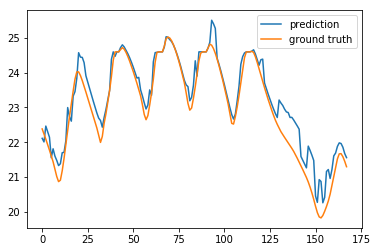

MSE on test set: 1.28626626735
MSE on train set: 0.00747315921263
3 buildings with 20 settings each in the test set, 9 in the train set


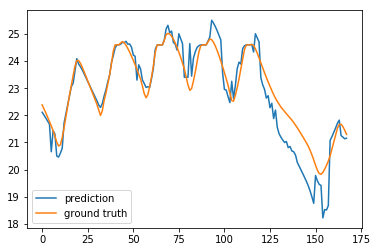

MSE on test set: 0.441405510327
MSE on train set: 0.00701516531012
3 buildings with 20 settings each in the test set, 9 in the train set


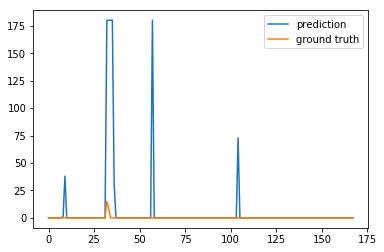

MSE on test set: 1601.7778361
MSE on train set: 11.3930560184
3 buildings with 20 settings each in the test set, 9 in the train set


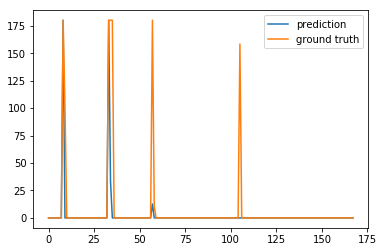

MSE on test set: 817.431521741
MSE on train set: 11.8210998742
3 buildings with 20 settings each in the test set, 9 in the train set


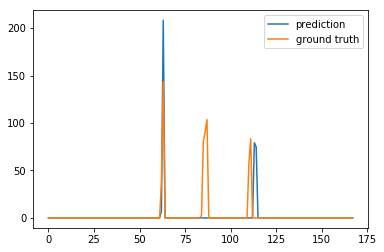

MSE on test set: 486.082242206
MSE on train set: 4.25424527179
3 buildings with 20 settings each in the test set, 9 in the train set


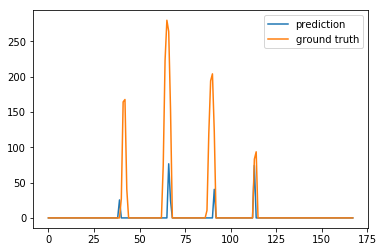

MSE on test set: 706.189571161
MSE on train set: 7.96387206447
3 buildings with 20 settings each in the test set, 9 in the train set


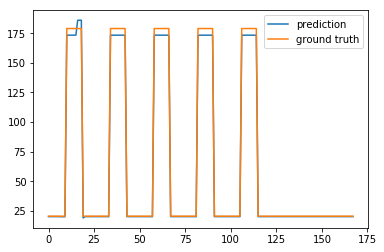

MSE on test set: 13.7505906022
MSE on train set: 5.08631501505e-21
3 buildings with 20 settings each in the test set, 9 in the train set


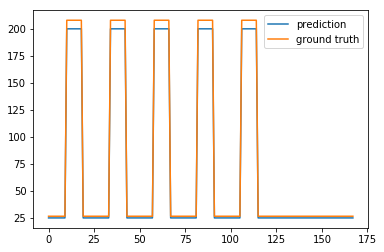

MSE on test set: 16.1650963547
MSE on train set: 5.46129670087e-21
3 buildings with 20 settings each in the test set, 9 in the train set


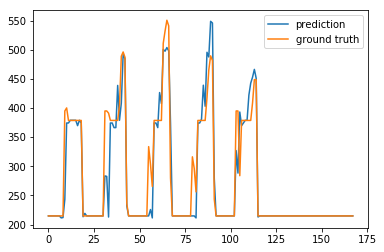

MSE on test set: 1371.84076071
MSE on train set: 18.7622016033
3 buildings with 20 settings each in the test set, 9 in the train set


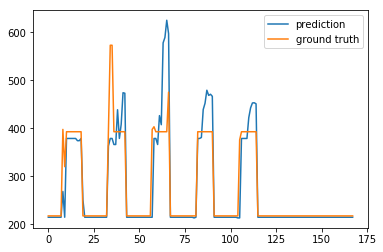

MSE on test set: 2373.55262968
MSE on train set: 15.835831264


In [21]:
for var in output['fields']:
    col_var = output['fields'][var]
    for i in range(2):
        model_tree = ModelTreeRegressor(all_features, output)
        model_tree.load_train_test_set(features_names=name_features, pct_train=.8, do_print=True)
        model_tree.fit_model(var)
        model_tree.test_model()

        Y_pred = model_tree.predict_model(model_tree.model, model_tree.X_test)
        num_sem = 14
        n1, n2 = n1, n2 = num_sem*24*7, num_sem*24*7 + 7*24
        plot(model_tree, n1, n2, Y_pred)

        # Test Score
        mse = sklearn.metrics.mean_squared_error(model_tree.Y_test[:, col_var], Y_pred)
        print("MSE on test set:", mse)

        # Train score
        Y_pred_train = model_tree.predict_model(model_tree.model, model_tree.X_train)
        mse_train = sklearn.metrics.mean_squared_error(model_tree.Y_train[:, col_var], Y_pred_train)
        print("MSE on train set:", mse_train)

In [23]:
output['fields']

{'Q_total_AC_kW': 2,
 'Q_total_gains_kW': 3,
 'Q_total_heating_kW': 1,
 'Q_total_kW': 4,
 'office_temperature_degreC': 0}

In [22]:
import scipy.fftpack

In [24]:
var = 'office_temperature_degreC'
model_tree = ModelTreeRegressor(all_features, output)
model_tree.load_train_test_set(features_names=name_features, pct_train=.8, do_print=True)
model_tree.fit_model(var)
model_tree.test_model()

Y_pred = model_tree.predict_model(model_tree.model, model_tree.X_test)

3 buildings with 20 settings each in the test set, 9 in the train set


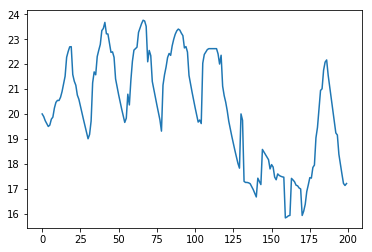

In [28]:
plt.plot(Y_pred[:200])
plt.show()

In [62]:
y = Y_pred
N = len(Y_pred)
x = range(N)

w = scipy.fftpack.rfft(y)
f = scipy.fftpack.rfftfreq(N, x[1]-x[0])
spectrum = w**2

print(spectrum.max())
cutoff_idx = spectrum < 1e8
print(cutoff_idx)
w2 = w.copy()
w2[cutoff_idx] = 0

y2 = scipy.fftpack.irfft(w2)

6.12993701757e+13
[False  True False ...,  True  True  True]


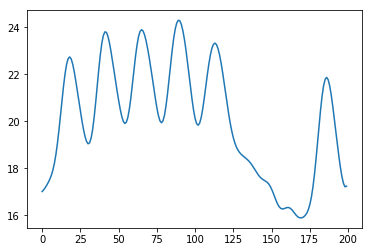

In [63]:
plt.plot(y2[:200])

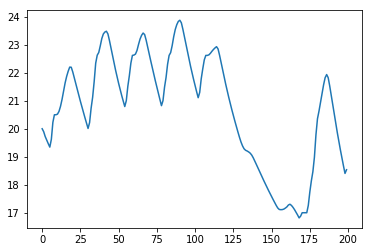

In [64]:
plt.plot(model_tree.Y_test[:200, 0])